In [52]:
import pandas as pd
import random
import numpy as np
import spacy
from tqdm import tqdm
from pprint import pprint
import re
import os
import time
import pickle
import tensorflow as tf
import tensorflow_hub as hub
import nltk
import nltk.data
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import line_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.chunk import tree2conlltags
from sklearn.model_selection import train_test_split
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk import PorterStemmer
from nltk.stem.porter import *
from gensim import corpora, models
from wordcloud import WordCloud, STOPWORDS
import nltk, math, codecs
from gensim.models import Doc2Vec
from nltk.cluster.kmeans import KMeansClusterer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
pd.set_option('display.max_colwidth', 200)
from nltk.collocations import *
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [53]:
n=57000
s=55000
random.seed(17)
skip = sorted(random.sample(range(n),n-s))
data = pd.read_csv("/Users/sbalas203/Downloads/Flex_activation/retention_upgrade.csv", skiprows=skip, header=0)
data.columns = ['Phrase']

In [54]:
len(data)

59189

In [55]:
data.head(5)

,Phrase
0,ON THAT I WAS MENTIONING HERE ... THEY NEED A RESET
1,I'M GONNA CHANGE ACCOUNT RECORDINGS ANOTHER YOU'RE GETTING THEM TWENTY FOUR SEVEN RECORDED RIGHT NOW
2,ANY CHANNEL LINE UP THAT YOU HAVE IS
3,UM ... T N T ... T AND T YOU WOULD HAVE OFFER BASKETBALL SERVICES ... THAT IS ONE
4,WHAT TIMES OF THE DAY ... YOU CAN ALWAYS PAS DEVICES ... BUT <UNK> WITH OUR SERVICES YOU CAN ALWAYS


In [59]:
# Extract product mentions 
data['flex'] = data['Phrase'].str.contains('flex')
data['hulu'] = data['Phrase'].str.contains('hulu | HULU')
data['netflix'] = data['Phrase'].str.contains('netflix | NETFLIX')
data['amazon'] = data['Phrase'].str.contains('amazon | prime | AMAZON | PRIME')
data['roku'] = data['Phrase'].str.contains('roku | ROKU')
data['youtube'] = data['Phrase'].str.contains('youtube | YOUTUBE')
data['streaming'] = data['Phrase'].str.contains('stream | streaming | STREAM | STREAMING')
data['peacock'] = data['Phrase'].str.contains('peacock | PEACOCK')
data['music'] = data['Phrase'].str.contains('spotify | SPOTIFY')
data['movie'] = data['Phrase'].str.contains('movie | movies | series')
data['hbo'] = data['Phrase'].str.contains('hbo | HBO')
data['tubi'] = data['Phrase'].str.contains('tubi | TUBI')
data['sports'] = data['Phrase'].str.contains('espn | nba | sports | sport | nfl | BFL | NBA')
data['news_channel'] = data['Phrase'].str.contains('news | nbc | fox | cnn | abc | NEWS | NBC | CNN | ABC')
data['DVR'] = data['Phrase'].str.contains('dvr | DVR | record | recording')
data['xbox'] = data['Phrase'].str.contains('xbox | XBOX | x box | X BOX | playstation | PLAYSTATION | PLAY STATION | play station')
data['ondemand'] = data['Phrase'].str.contains('ondemand | on demand | ONDEMAND | ON DEMAND')
data['stream_app'] = data['Phrase'].str.contains('stream app | STREAM APP | APP | STREAMAPP')

#convert flags to numeric 1 & 0 for easy counting
data['flex'] = data['flex'].astype(int)
data['hulu'] = data['hulu'].astype(int)
data['netflix'] = data['netflix'].astype(int)
data['amazon'] = data['amazon'].astype(int)
data['roku'] = data['roku'].astype(int)
data['youtube'] = data['youtube'].astype(int)
data['streaming'] = data['streaming'].astype(int)
data['peacock'] = data['peacock'].astype(int)
data['music'] = data['music'].astype(int)
data['movie'] = data['movie'].astype(int)
data['hbo'] = data['hbo'].astype(int)
data['tubi'] = data['tubi'].astype(int)
data['sports'] = data['sports'].astype(int)
data['news_channel'] = data['news_channel'].astype(int)
data['DVR'] = data['DVR'].astype(int)
data['xbox'] = data['xbox'].astype(int)
data['ondemand'] = data['ondemand'].astype(int)
data['stream_app'] = data['stream_app'].astype(int)


In [60]:
data['xbox'].value_counts()

0    59156
1       33
Name: xbox, dtype: int64

In [61]:
data['flex'].value_counts()

0    59189
Name: flex, dtype: int64

In [68]:
from IPython.display import display
display(data['flex'].value_counts())
display(data['xbox'].value_counts())
display(data['amazon'].value_counts())
display(data['hbo'].value_counts())
display(data['movie'].value_counts())
display(data['netflix'].value_counts())
display(data['youtube'].value_counts())
display(data['sports'].value_counts())
display(data['peacock'].value_counts())
display(data['stream_app'].value_counts())

0    59189
Name: flex, dtype: int64

0    59156
1       33
Name: xbox, dtype: int64

0    59117
1       72
Name: amazon, dtype: int64

0    59022
1      167
Name: hbo, dtype: int64

0    59189
Name: movie, dtype: int64

0    58813
1      376
Name: netflix, dtype: int64

0    59181
1        8
Name: youtube, dtype: int64

0    59185
1        4
Name: sports, dtype: int64

0    59124
1       65
Name: peacock, dtype: int64

0    58872
1      317
Name: stream_app, dtype: int64

In [16]:
stopwords = set(STOPWORDS) 
#Specify a list of stop words to remove
more_stops=['I','say','wanna','hello','na','gon','get','uh','right','guy','still','come','say','someth','mean','um','oh','yes','bye','great','yeah','no','sorry','ok','okay','thank','like','alright','know','a',
 'about','above','after','again','against','all','also','am','an','and','any','are',"aren't",'as', 'at','be','because','been','before','being','below','between','both','but','by','can',"can't",
            'cannot','com','could',"couldn't",'did', 'ye','my','pai','finity',
            "didn't",'do','does', "doesn't",'doing',"don't",'down','during','each','else','ever', 'few','for','from','further','get','had',"hadn't",'has',"hasn't",'have',"haven't",
'having','he',"he'd","he'll","he's",'her','here',"here's",'hers','herself','him','himself','his','how',"how's",'however','http','i',"i'd","i'll","i'm","i've",'if','in','into','is',"isn't",
 'it',"it's",'its','itself','just','k',"let's",'like','me','more','most',"mustn't",'my','myself','no','nor','not','of','off','on','once','only','or','other','otherwise','ought','our','ours','ourselves',
            'out','over','own','r','same','f','shall',"shan't",'she',"she'd","she'll","she's","<UNK>","...",
 'should',"shouldn't",'since','so','some','such','than','that',"that's",'the','their','theirs','them','themselves','then','there',"there's",'these','they',"they'd","they'll","they're","they've",'this','those',
'through','to','too','under','until','up','very','was','said',"wasn't",'we','got', "we'd","we'll","we're","we've",'were',"weren't",'what',"what's",'when',"when's",'where',"where's",'which','while','who',"who's",'whom',
'why',"why's",'with',"won't",'would',"wouldn't",'www','you',"you'd","you'll","you're","you've",'your','yours','yourself','yourselves','going','see','nothing','well','one','want', 'us', 'for', 'am', 'say', 'and', 'been',
'someone', 'that', 'so', 'for', 'why', 'am', 'or', 'else', 'main', 'if', 'need', 'do','unk',
              'know', 'want', 'them', 'back', 'will', 'all', 'keep', 'a', 's', 'too', 'at', 'way', 'with',"gonna",
              'when', 'we', 'with', 'since', 'at', 'does', 're', 'when', 'give', 'talk', 'got','kinda',
              'them', 'someone', 'told', 'back', 'way', 'is', 'too', 'its', 'much', 'going', 'keeps',
              'goes', 'every', 'went', 'and', 'been', 'with', 'some', 've', 'we', 'a', 'had', 'and','let','anything','allows','cause',
      'on', 'all', 'see', 'make', 'say', 'us', 's', 'came','lot','able','takes','think','it','i','try','bit','for',
             'thats','much','getting','really','now','t','turn','for','me',' t','it','getting','now',' me',' t','  t','much',
             'days','now','thought','thats','fact','looking','choose','thing','enough','overall','fine','far',
             'everytime','whenever','always','long','alot','needed','recently','wish','done','usually',"go",
              'sometimes','pretty','month','year','im','change','hold','trying','l','1','ou','d','putting','put',
              'didnt','comes','come','needs','need','seems','seem','tried','try','mostly','sure','certain',
              'cant','can','wanted','want','changes','change','last','first','several','couple','took','take','times',
              'prices','paying','though','thought','feel','live','another','depends','choices',"it'll",
              'day','minute','minutes','everything','options','better','compared','calling','quickly','week',
              'speak','hours','person','day','faster','less','ten','show','night','theres','part','yet','number',
              'ive','weeks','asked','ask','stuff','little','almost','beleive','believe','dont','somebody',
              'using', 'never','happens','three','five','two','ago','constantly','basically','around','used',
              'others','probably','quite','except','everyone','lost','extremely','higher','wait','tell','kind',
              'end','something','others','job','months','wrong','check','lately','even','provide','actually',
              'job','changing','everybody','second','gets','many','find','supposed','without','taken','gone','cuts',
              'called','use','many','guys','things','whole','anymore','big','understand','rip','realized','robert','kyle','curtis','letting',
              'becoming','depend','elsewhere','effect','letting','tells','sixth','st','stating','st','somehow','frankly','body','originally','op','must'
              ,'automatically','steve','fi','include','anyways'] 

stop_words = set(nltk.corpus.stopwords.words('english')+more_stops)

In [17]:
def lemmatize_stemming(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stop_words and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [18]:
from gensim.parsing.porter import PorterStemmer
def lemmatize_stemming(text):
    return PorterStemmer().stem(text)

In [19]:
processed_docs = data['Phrase'].map(preprocess)
processed_docs[:20]

0                                        [mention, reset]
1          [account, record, twenti, four, seven, record]
2                                         [channel, line]
3                              [offer, basketbal, servic]
4                                         [devic, servic]
5                          [credit, adjust, dark, annett]
6                                           [bill, sixti]
7                [moment, ahead, time, debit, run, quest]
8                                                      []
9                                 [access, record, coupl]
10                                       [sport, channel]
11                   [definit, home, insur, provid, call]
12                                [batteri, happen, work]
13                                     [follow, virginia]
14                                     [twenti, individu]
15    [line, includ, sport, sport, channel, sport, event]
16               [perfect, servic, internet, home, secur]
17            

In [20]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 mention
1 reset
2 account
3 four
4 record
5 seven
6 twenti
7 channel
8 line
9 basketbal
10 offer


In [21]:
dictionary.filter_extremes(no_below=5, no_above=0.4, keep_n=10000)

In [22]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[2]

[(7, 1), (8, 1)]

In [23]:
bow_doc_1 = bow_corpus[100]
for i in range(len(bow_doc_1)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_1[i][0], 
                                               dictionary[bow_doc_1[i][0]], 
bow_doc_1[i][1]))

Word 2 ("account") appears 1 time.
Word 146 ("login") appears 1 time.
Word 153 ("ecobil") appears 1 time.
Word 154 ("statu") appears 1 time.


In [24]:
#LDA using bag of words
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(5,4):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.049*"servic" + 0.033*"look" + 0.031*"good" + 0.029*"laughter"
Topic: 1 
Words: 0.038*"twenti" + 0.037*"time" + 0.035*"dollar" + 0.029*"call"
Topic: 2 
Words: 0.076*"internet" + 0.054*"account" + 0.040*"xfiniti" + 0.027*"name"
Topic: 3 
Words: 0.053*"order" + 0.046*"bill" + 0.035*"modem" + 0.030*"home"
Topic: 4 
Words: 0.056*"phone" + 0.031*"send" + 0.031*"four" + 0.027*"email"


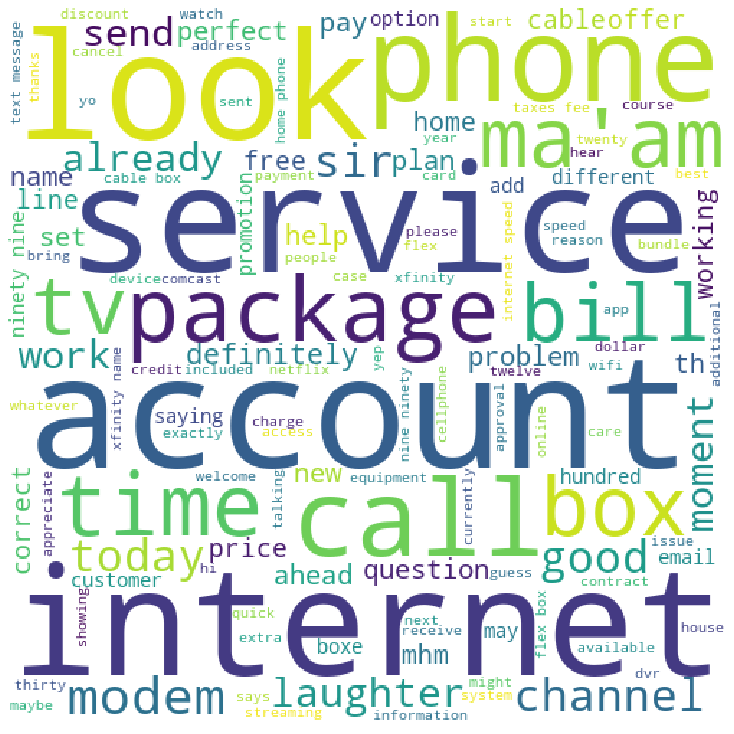

In [25]:
comment_words = ' '
stop_words = set(nltk.corpus.stopwords.words('english')+more_stops)

# iterate through the csv file 
for val in data.Phrase: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 

In [26]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# Convert to list
data = data.Phrase.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:2])

['SO THERES A COUPLE DIFFERENT OPTIONS HERE ... THE OFFICE SO YOU HAVE THE '
 'STANDARD <UNK> ... EVERYDAY PRICING WHICH IS THE ONE OH THREE PLUS FOURTEEN '
 '... THAT THERES AN ADDITIONAL ... IN FOR LOOKS LIKE ... STARTING A ... '
 'EIGHTY ... BUT THIS IS WITH ... COMBINATION ... WHAT WE CALL THE THE FLEX '
 '... <UNK> BASICALLY ITS A PROMOTIONAL OR THE ... SIX HUNDRED MEGABYTES BUT '
 'WE GIVE YOU A FREE ... UM LIKE A A WHAT A CONFLICT BOX ... ITS R ... ONE OF '
 'OUR STREAMING TV BOXES ... TWENTY SEVEN DIFFERENT APPS ... THEIR STREAMING '
 'APPS ... ABSOLUTELY FOR FREE ... BUT SINCE IT IS A COMBO OFFER THATS WHAT '
 'YOU GET LIKE <UNK> WITH THE DISCOUNT OFF YOUR ... UM LIKE OFF YOUR MAIN '
 'PROBLEM ... SO YOU HAVE THE BREAK ON THE INTERNET FOR THE FIRST YEAR ... UM '
 'AND THIS ALSO DOESNT COME WITH ANY TYPE OF CONTRACT OR ANYTHING ... NOW '
 'THERES AN ADDITIONAL OFFER FOR THE TWELVE MONTH CONTRACT ... IF YOU ... TO '
 'DO WITH THAT WAY ... YOU HAVE <UNK> ... YOU CAN GET THAT ACTU

In [46]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['so', 'theres', 'couple', 'different', 'options', 'here', 'the', 'office', 'so', 'you', 'have', 'the', 'standard', 'unk', 'everyday', 'pricing', 'which', 'is', 'the', 'one', 'oh', 'three', 'plus', 'fourteen', 'that', 'theres', 'an', 'additional', 'in', 'for', 'looks', 'like', 'starting', 'eighty', 'but', 'this', 'is', 'with', 'combination', 'what', 'we', 'call', 'the', 'the', 'flex', 'unk', 'basically', 'its', 'promotional', 'or', 'the', 'six', 'hundred', 'megabytes', 'but', 'we', 'give', 'you', 'free', 'um', 'like', 'what', 'conflict', 'box', 'its', 'one', 'of', 'our', 'streaming', 'tv', 'boxes', 'twenty', 'seven', 'different', 'apps', 'their', 'streaming', 'apps', 'absolutely', 'for', 'free', 'but', 'since', 'it', 'is', 'combo', 'offer', 'thats', 'what', 'you', 'get', 'like', 'unk', 'with', 'the', 'discount', 'off', 'your', 'um', 'like', 'off', 'your', 'main', 'problem', 'so', 'you', 'have', 'the', 'break', 'on', 'the', 'internet', 'for', 'the', 'first', 'year', 'um', 'and', 'this'

In [47]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

['theres', 'some', 'number', 'here', 'you', 'also', 'do', 'get', 'unk', 'its', 'called', 'um', 'make', 'sure', 'any', 'flex', 'unk', 'is', 'actually', 'streaming', 'hob', 'thats', 'the', 'best', 'way', 'would', 'really', 'um', 'corporate', 'so', 'there', 'is', 'unk', 'free', 'movie', 'content', 'on', 'there', 'for', 'some', 'of', 'the', 'free', 'apps', 'out', 'there', 'unk', 'as', 'well', 'as', 'the', 'hob', 'for', 'if', 'you', 'want', 'netflix', 'should', 'be', 'one', 'who', 'like', 'all', 'in', 'one', 'place', 'you', 'access', 'well']


In [48]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [49]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

[['different', 'office', 'standard', 'everyday', 'pricing', 'additional', 'look', 'start', 'combination', 'call', 'promotional', 'megabyte', 'free', 'streaming', 'tv', 'box', 'different', 'app', 'stream', 'app', 'absolutely', 'free', 'offer', 'discount', 'problem', 'break', 'internet', 'type', 'contract', 'additional', 'offer', 'contract', 'low', 'look', 'dollar', 'offer', 'additional', 'auto', 'bill', 'pay', 'base', 'package', 'pay', 'free', 'agreement', 'agreement', 'promotion', 'standard', 'price'], ['flex', 'streaming', 'hob', 'best', 'corporate', 'free', 'movie', 'content', 'free', 'app', 'netflix', 'place', 'access']]


In [50]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 3), (2, 2), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 2), (13, 1), (14, 1), (15, 1), (16, 3), (17, 1), (18, 2), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)]]


In [51]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=True)

In [52]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.073*"work" + 0.048*"pay" + 0.044*"connect" + 0.033*"may" + 0.032*"moment" '
  '+ 0.030*"available" + 0.025*"wifi" + 0.025*"definitely" + 0.022*"help" + '
  '0.020*"double"'),
 (1,
  '0.081*"order" + 0.066*"dollar" + 0.066*"charge" + 0.055*"service" + '
  '0.039*"monthly" + 0.037*"follow" + 0.035*"fee" + 0.032*"equipment" + '
  '0.031*"approve" + 0.027*"agreement"'),
 (2,
  '0.108*"plan" + 0.077*"discount" + 0.057*"xfinity" + 0.054*"unlimited" + '
  '0.038*"slash" + 0.037*"switch" + 0.036*"next" + 0.036*"register" + '
  '0.031*"installation" + 0.028*"dot"'),
 (3,
  '0.128*"box" + 0.106*"flex" + 0.081*"free" + 0.049*"service" + 0.048*"tv" + '
  '0.039*"stream" + 0.033*"streaming" + 0.025*"charge" + 0.023*"access" + '
  '0.022*"be"'),
 (4,
  '0.063*"modem" + 0.062*"send" + 0.062*"be" + 0.057*"will" + 0.055*"ahead" + '
  '0.040*"order" + 0.033*"account" + 0.029*"bring" + 0.029*"ill" + '
  '0.028*"email"'),
 (5,
  '0.135*"drop" + 0.099*"look" + 0.081*"equipment" + 0.042*"problem" 

In [53]:
#model evaluation
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.84615262558488

Coherence Score:  0.6236368022126655


In [54]:
lda_model.top_topics(bow_corpus)

[([(0.12759978, 'box'),
   (0.10603473, 'flex'),
   (0.080626525, 'free'),
   (0.04881214, 'service'),
   (0.047739923, 'tv'),
   (0.038543474, 'stream'),
   (0.032733127, 'streaming'),
   (0.024986504, 'charge'),
   (0.023282044, 'access'),
   (0.021746913, 'be'),
   (0.020509742, 'device'),
   (0.019510236, 'include'),
   (0.016942354, 'give'),
   (0.01578509, 'watch'),
   (0.015374338, 'cost'),
   (0.015327609, 'remote'),
   (0.014238645, 'movie'),
   (0.0137988515, 'add'),
   (0.0137792565, 'cable'),
   (0.013381505, 'show')],
  -3.142452565739196),
 ([(0.062508635, 'modem'),
   (0.062344033, 'send'),
   (0.062276214, 'be'),
   (0.057397094, 'will'),
   (0.055007733, 'ahead'),
   (0.04011071, 'order'),
   (0.033232946, 'account'),
   (0.0293574, 'bring'),
   (0.028638968, 'ill'),
   (0.028047781, 'email'),
   (0.024761207, 'call'),
   (0.022637885, 'technician'),
   (0.016960138, 'receive'),
   (0.014669792, 'text_message'),
   (0.01439418, 'confirm'),
   (0.012721473, 'home'),
   

In [55]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.161075  0.166348       1        1  33.048065
7      0.194836 -0.022230       2        1  14.662853
1      0.211433  0.013359       3        1  13.294272
6     -0.160415  0.312050       4        1  12.605810
4      0.172242 -0.120209       5        1  10.876872
0     -0.193919 -0.199126       6        1   7.762297
5     -0.120321 -0.227718       7        1   4.133574
2     -0.264931  0.077525       8        1   3.616263, topic_info=    Category          Freq        Term         Total  loglift  logprob
17   Default  13660.000000    internet  13660.000000  30.0000  30.0000
7    Default  20341.000000         box  20341.000000  29.0000  29.0000
40   Default  17069.000000        flex  17069.000000  28.0000  28.0000
16   Default  12842.000000        free  12842.000000  27.0000  27.0000
14   Default   9321.000000      dollar   9321.000000  26.0000  26.0000
..       ...           ...         ...           ...      ...      ...
73    Topic8    984.860596     xfinity   4122.976562   1.8879  -2.8734
153   Topic8    195.896973        find    379.819763   2.6576  -4.4883
11    Topic8    247.524307    contract    962.989563   1.9612  -4.2543
1     Topic8    267.084229  additional   2059.912598   1.2769  -4.1783
126   Topic8    164.364426         may   1385.770630   1.1878  -4.6638

[350 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         4  0.999300  absolutely
36        1  0.999681      access
136       2  0.465990     account
136       5  0.533698     account
219       1  0.246685    activate
...     ...       ...         ...
314       2  0.997196       worry
315       4  0.999305       would
73        4  0.760858     xfinity
73        8  0.238905     xfinity
876       2  0.996729        year

[377 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 2, 7, 5, 1, 6, 3])

In [31]:
# Cleaing the text for skip gram model
data = data.to_string()
data = data.lower()
data = re.sub('[^a-zA-Z]', ' ', data )
data = re.sub(r'\s+', ' ', data)

# Preparing the dataset
all_sentences = nltk.sent_tokenize(data)

all_words = [nltk.word_tokenize(sent) for sent in all_sentences]
#stop_words = set(nltk.corpus.stopwords.words('english')+more_stops)
# Removing Stop Words
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stop_words]

In [32]:
#Skip Gram
model = gensim.models.Word2Vec(all_words, min_count = 1, size = 100, 
                                             window = 7, sg = 1, workers=5)

In [39]:
#Flex
model.wv.most_similar(positive=['flex'],topn=300)

[('returning', 0.8312326669692993),
 ('delivered', 0.8273178935050964),
 ('watc', 0.8209248781204224),
 ('black', 0.8183969259262085),
 ('picked', 0.814365029335022),
 ('flat', 0.8135312795639038),
 ('outlets', 0.8107536435127258),
 ('collects', 0.8091937303543091),
 ('confused', 0.804634690284729),
 ('box', 0.8031522035598755),
 ('sort', 0.7987689971923828),
 ('wants', 0.7976765632629395),
 ('tiny', 0.796918511390686),
 ('streaming', 0.7953651547431946),
 ('remotes', 0.7929801940917969),
 ('shipped', 0.7928787469863892),
 ('individually', 0.7925536632537842),
 ('plugged', 0.792489767074585),
 ('hook', 0.7917896509170532),
 ('marks', 0.7898977994918823),
 ('free', 0.7895259261131287),
 ('pending', 0.7886921167373657),
 ('receipt', 0.7865906953811646),
 ('fl', 0.7857561707496643),
 ('words', 0.7853384613990784),
 ('bo', 0.7849381566047668),
 ('emails', 0.7842427492141724),
 ('easy', 0.7834070920944214),
 ('wo', 0.7814304232597351),
 ('act', 0.7804769277572632),
 ('version', 0.7804306745

In [37]:
model.wv.most_similar(negative=['flex'],topn=300)

[('automated', -0.29448193311691284),
 ('data', -0.3167409896850586),
 ('phones', -0.32240408658981323),
 ('social', -0.33475226163864136),
 ('born', -0.33642876148223877),
 ('cycle', -0.339121013879776),
 ('password', -0.341154545545578),
 ('unlimited', -0.34235072135925293),
 ('digits', -0.3451647162437439),
 ('porting', -0.3458910882472992),
 ('autopay', -0.3465961813926697),
 ('verizon', -0.35053467750549316),
 ('system', -0.3553646206855774),
 ('share', -0.35673439502716064),
 ('followed', -0.3600827157497406),
 ('enter', -0.3631880283355713),
 ('early', -0.37419936060905457),
 ('confirming', -0.37464359402656555),
 ('security', -0.3749263286590576),
 ('zero', -0.3776455223560333),
 ('play', -0.3794153928756714),
 ('native', -0.37944385409355164),
 ('submitting', -0.3815217912197113),
 ('spend', -0.3830091655254364),
 ('automatic', -0.38424891233444214),
 ('key', -0.3847997188568115),
 ('press', -0.3861321210861206),
 ('june', -0.3862707018852234),
 ('verification', -0.38822638988

In [69]:
model.wv.most_similar('flex', topn=1000)

[('returning', 0.8312326669692993),
 ('delivered', 0.8273178935050964),
 ('watc', 0.8209248781204224),
 ('black', 0.8183969259262085),
 ('picked', 0.814365029335022),
 ('flat', 0.8135312795639038),
 ('outlets', 0.8107536435127258),
 ('collects', 0.8091937303543091),
 ('confused', 0.804634690284729),
 ('box', 0.8031522035598755),
 ('sort', 0.7987689971923828),
 ('wants', 0.7976765632629395),
 ('tiny', 0.796918511390686),
 ('streaming', 0.7953651547431946),
 ('remotes', 0.7929801940917969),
 ('shipped', 0.7928787469863892),
 ('individually', 0.7925536632537842),
 ('plugged', 0.792489767074585),
 ('hook', 0.7917896509170532),
 ('marks', 0.7898977994918823),
 ('free', 0.7895259261131287),
 ('pending', 0.7886921167373657),
 ('receipt', 0.7865906953811646),
 ('fl', 0.7857561707496643),
 ('words', 0.7853384613990784),
 ('bo', 0.7849381566047668),
 ('emails', 0.7842427492141724),
 ('easy', 0.7834070920944214),
 ('wo', 0.7814304232597351),
 ('act', 0.7804769277572632),
 ('version', 0.7804306745